# Лабораторная работа 1

## Полиномиальная аппроксимация распределения выборки с использованием метода градиентного спуска

1. Цель работы:

    1. Изучить принцип работы метода градиентного спуска.

    2. Научиться реализовывать метод градиентного спуска с использованием пакетов TensorFlow, NumPy языка программирования Python для задачи оптимизации функции потерь.

    3. Освоить создание искусственных наборов данных для проверки работы алгоритма.

    4. Применить полученные знания для решения задачи аппроксимации распределения выборки.


2. Основные задачи работы:

    1. Создание искусственной выборки для проверки работы алгоритма.

    2. Реализация алгоритма градиентного спуска.

    3. Визуализация и анализ результатов.

In [123]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Выполнение работы

1. Создание искусственного набора данных: Используйте любые подходящие инструменты (например, NumPy, Tensorflow) для создания искусственной выборки, которая будет использоваться для обучения модели. Данные должны быть сгенерированы таким образом, чтобы между входными и выходными данными была квадратичная зависимость.

[[  6.8552637  159.50735   ]
 [  8.926552   260.0757    ]
 [  1.6438315   14.979346  ]
 [  9.714198   307.02844   ]
 [  8.10823    224.49295   ]
 [ -3.052912    24.41193   ]
 [  0.69941527  -1.6118474 ]
 [  2.478283    19.66981   ]
 [ -5.9577804   89.16007   ]
 [  2.981508    33.30907   ]]


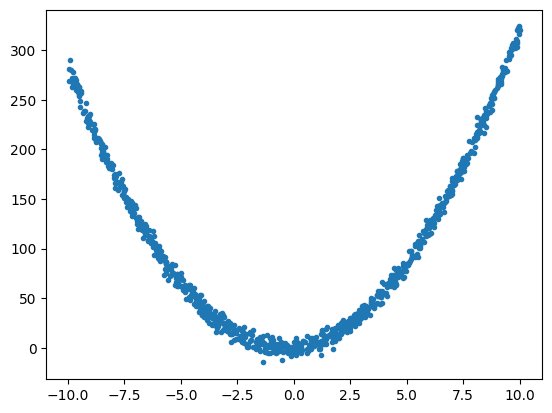

In [124]:
# Parameters for synthetic dataset
num_samples = 1000  # Number of samples
noise_factor = 5    # Noise to be added to the data

# Generate random input data (X)
X = np.random.uniform(-10, 10, num_samples)

# Generate output data (y) with a quadratic relationship 
Y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, noise_factor, num_samples)

X = tf.convert_to_tensor(X, dtype=tf.float32)

Y = tf.convert_to_tensor(Y, dtype=tf.float32)

# Stack input and output into a dataset for training
synthetic_data = np.column_stack((X, Y))

# Preview a sample of the synthetic dataset
print(synthetic_data[:10])  # Show first 10 rows

plt.plot(X, Y, '.')
plt.show()

2. Инициализация переменных и определение функции потерь: Используйте TensorFlow для создания переменных, которые будут представлять веса модели. Определите функцию потерь, которую вы планируете минимизировать.

In [125]:
#Model difinition
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.W1 = tf.Variable(2.0, name='W1')
    self.W2 = tf.Variable(4.0, name='W2')
    self.b = tf.Variable(2.0, name='b')

  def __call__(self, x):
    return self.W1 * x**2 + self.W2 * x + self.b
  
# Define the loss function (mean squared error)
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

3. Реализация градиентного спуска: Создайте оптимизатор TensorFlow (например, tf.train.GradientDescentOptimizer) и используйте его для минимизации функции потерь. Оптимизатор автоматически вычислит градиенты и обновит веса модели.

In [133]:
# Initialize model and optimizer
model = MyModel()
optimizer = tf.optimizers.SGD(learning_rate=0.0001)

# Create a training step function
def train_step(model, inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        current_loss = loss(outputs, predictions)
    gradients = tape.gradient(current_loss, [model.W1, model.W2, model.b])
    optimizer.apply_gradients(zip(gradients, [model.W1, model.W2, model.b]))
    return current_loss

# Training loop
epochs = 100
loss_history = []
print(f"Initial parameters: W1 = {model.W1.numpy()}, W2 = {model.W2.numpy()}, b = {model.b.numpy()}")
for epoch in range(epochs):
    current_loss = train_step(model, X, Y)
    loss_history.append(current_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")
    # Check if the loss becomes NaN, and stop training if that happens
    if tf.math.is_nan(current_loss):
        print("Training stopped due to NaN values in the loss.")
        break

# After training, you can inspect the learned parameters
print(f"Trained parameters: W1 = {model.W1.numpy()}, W2 = {model.W2.numpy()}, b = {model.b.numpy()}")

Initial parameters: W1 = 2.0, W2 = 4.0, b = 2.0
Epoch 0: Loss = 2058.77880859375
Epoch 10: Loss = 140.43487548828125
Epoch 20: Loss = 125.89205932617188
Epoch 30: Loss = 113.23615264892578
Epoch 40: Loss = 102.1783676147461
Epoch 50: Loss = 92.51696014404297
Epoch 60: Loss = 84.07553100585938
Epoch 70: Loss = 76.70002746582031
Epoch 80: Loss = 70.25589752197266
Epoch 90: Loss = 64.62538146972656
Trained parameters: W1 = 2.9765522480010986, W2 = 3.038485288619995, b = 2.007078170776367


4. Тренировка модели и визуализация результатов: Обучите модель на сгенерированных данных и визуализируйте результаты с помощью любых подходящих инструментов визуализации (например, Matplotlib). Представьте как изменяется значение функции потерь в процессе обучения и как модель аппроксимирует исходные данные.

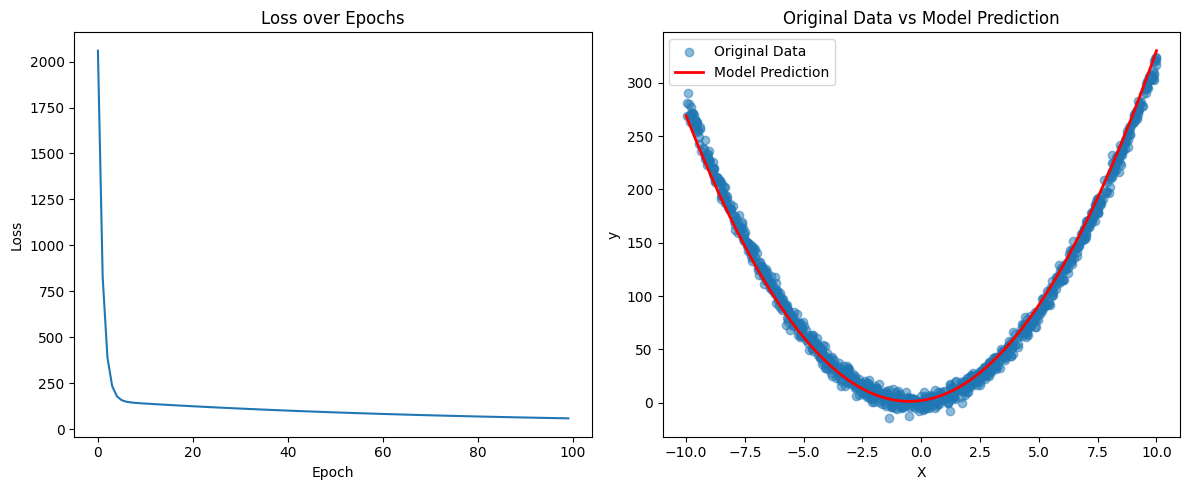

In [134]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

X_test = np.linspace(-10, 10, 100)
y_pred = model(X_test).numpy()

plt.subplot(1, 2, 2)
plt.scatter(X, Y, label='Original Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Model Prediction', linewidth=2)
plt.title('Original Data vs Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## Контрольные вопросы:

### Что такое градиентный спуск и как он используется в машинном обучении?

Градиентный спуск — это метод оптимизации, который используется для минимизации функции потерь. Он обновляет параметры модели, чтобы уменьшить ошибку.

Алгоритм:
1. Инициализация. Параметры модели (например, веса нейронной сети) инициализируются случайными значениями.
2. Вычисление градиента. Считается градиент функции потерь по отношению к каждому параметру. Градиент указывает направление наибольшего увеличения функции.
3. Обновление параметров. Параметры обновляются в направлении, противоположном градиенту, с шагом, определённым коэффициентом обучения (learning rate).
4. Повторение. Эти шаги повторяются до тех пор, пока не достигнется минимальная ошибка (или не будет удовлетворено другое условие остановки).

### Что такое градиент в контексте градиентного спуска?

Градиент — это вектор частных производных функции потерь по каждому параметру модели. Он показывает направление и величину изменения, которое приведёт к наибольшему увеличению функции.

В контексте градиентного спуска мы используем градиент, чтобы определить, как нужно скорректировать параметры модели. Двигаясь в противоположную сторону градиента, мы уменьшаем функцию потерь и тем самым улучшаем качество модели.

### Как обновляются веса в градиентном спуске?

Веса обновляются по следующей формуле:

$$
W_{\text{new}} = W_{\text{old}} - \eta \cdot \nabla L
$$

Где:
- $ W_{\text{old}} $ — текущее значение весов,
- $ \eta $ (learning rate) — коэффициент обучения, который задаёт размер шага,
- $ \nabla L $ — градиент функции потерь по весам.

Градиент показывает направление увеличения функции потерь, поэтому мы вычитаем его, чтобы минимизировать ошибку.

### Что такое тензор в TensorFlow?

Тензор в TensorFlow — это многомерный массив (обобщение матриц) чисел, который используется для представления данных. Тензоры могут иметь разные размеры (размерность или ранг) — от скаляров (ранг 0) до многомерных массивов (ранг n).

Примеры тензоров:
- Скаляры: одномерные числа, ранг 0.
- Векторы: одномерные массивы, ранг 1.
- Матрицы: двумерные массивы, ранг 2.

TensorFlow использует тензоры для представления входных данных, весов моделей и промежуточных вычислений.

### По какой причине метод градиентного спуска может остановиться в задаче оптимизации функции потерь?

Метод градиентного спуска может остановиться по следующим причинам:

1. **Достигнут локальный минимум**: Градиент близок к нулю, и больше нет значимых изменений в параметрах.
2. **Малый градиент**: Градиент слишком мал, и изменения параметров становятся незначительными (так называемое "затухание градиентов").
3. **Достигнут порог итераций**: Алгоритм останавливается после заранее определённого числа итераций.
4. **Низкий learning rate**: Если шаг обновления весов слишком мал, градиентный спуск может медленно сходиться и "застрять".
5. **Достигнут критерий точности**: Разница в значениях функции потерь между итерациями становится меньше порога.

### При нахождении хорошо аппроксимирующего полинома к какому значению стремится функция потерь?

При нахождении хорошо аппроксимирующего полинома, функция потерь стремится к значению, близкому к нулю. Это означает, что модель минимизировала разницу между предсказанными значениями и истинными данными, и полином хорошо аппроксимирует зависимость.